In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time 
from tqdm import tqdm


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve, make_scorer

import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

In [3]:
churn = pd.read_csv('/content/drive/My Drive/Collab file/Churn.csv')

In [4]:
# функция для распаковки данных

def open_data(data):
  display(data.head())
  print('------------------------')
  print('Общая информация')
  data.info()
  print('------------------------')
  print('Описание данных')
  display(data.describe())
  print('------------------------')
  print('Количество дубликатов')
  print(data.duplicated().sum())
  print('------------------------')
  print('Количество пропусков')
  display(data.isna().sum())

In [5]:
open_data(churn)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
------------------------
Описание данных


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

**Комметарий:** 
<br>Данные выглядят нормально, типы данных также в порядке, есть пропуски в столбце ***Tenure***, возможно, это связано с тем, что клиент новый и данных по нему нет. Количество пропусков не существенное, поэтому можем их просто удалить. Также я бы удалила столбцы ***RowNumber***, ***CustomerId*** и ***Surname*** - думаю, что они не показательны. Также я бы привела названия колонок к нижнему регистру для удобства.

In [6]:
#избавимся от пропусков

churn = churn.dropna()

In [7]:
#избавимся от лишних признаков

churn = churn.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [8]:
# приведем название столбцов к нижнему регистру

churn.columns = map(str.lower, churn.columns)

In [9]:
# приведем названия столбцом к змеиному регистру

churn = churn.rename({'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'}, axis=1)

In [10]:
#сделаем новый датафрейм с защитой от дамми-ловушки

churn_ohe = pd.get_dummies(churn, drop_first=True)

In [11]:
#разобьем данные на выборки, сначала на обучающую и валидационную

target = churn_ohe['exited']
features = churn_ohe.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [12]:
#теперь из валидационной выборки отделим данные для тестовой, итоговая разбивка будет 3:1:1

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [13]:
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(5454, 11) (1818, 11) (1819, 11)
(5454,) (1818,) (1819,)


## Исследование задачи

0    7237
1    1854
Name: exited, dtype: int64


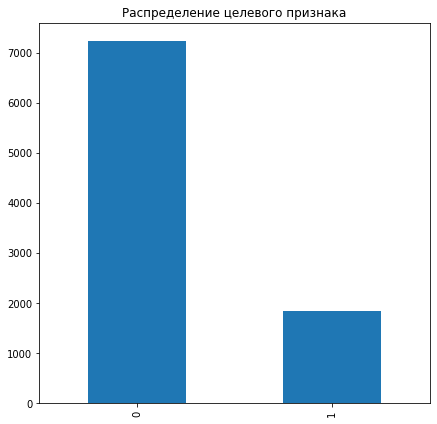

In [14]:
#сначала проверим, как часто в целевом признаке встречается класс «1» или «0»

class_frequency = churn_ohe['exited'].value_counts()
print(class_frequency)

plt.figure(figsize=(7, 7))
plt.title('Распределение целевого признака')
class_frequency.plot(kind='bar')

**Комментарий:**
<br>Существует серьезный дисбаланс, конечно, это связано с тем, что не так много клиентов ушло. Но думаю, что это сильно повлияет на результаты модели.

In [15]:
# добавим таблицу для сведения результатов

def metrics(result_valid, f1, auc_roc, model, data):
    data.loc[model, 'Accuracy_valid'] = result_valid
    data.loc[model, 'F1 score'] = f1
    data.loc[model, 'AUC ROC'] = auc_roc
    
    return data

In [16]:
# таблица для сравнения результатов работы моделей

compare_models = pd.DataFrame(columns=['Accuracy_valid', 'F1 score', 'AUC ROC'])

### Дерево решений

In [17]:
%%time 

# подберем наилучшие параметры для модели дерева решений

best_criterion = None
best_depth = 0
best_model_d = None
best_result_d = 0

for crit in tqdm(['gini', 'entropy']):
    for depth in range(4,30): 
        model_d = DecisionTreeClassifier(random_state=4545, criterion=crit,
                                     max_depth=depth)
        model_d.fit(features_train, target_train)
        predictions = model_d.predict(features_valid)
        result = model_d.score(features_valid, target_valid)
        if result > best_result_d:
           best_criterion = crit
           best_depth = depth
           best_model_d = model_d
           best_result_d = result
                    

print('Accuracy наилучшей модели на валидационной выборке:', best_result_d)
print('Глубина:', best_depth)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8619361936193619
Глубина: 6
Критерий расщепления: entropy
CPU times: user 1.78 s, sys: 0 ns, total: 1.78 s
Wall time: 1.79 s


In [18]:
%%time

model_dt = DecisionTreeClassifier(random_state=4545, max_depth=6, criterion='entropy')
model_dt.fit(features_train, target_train)
predicted_valid = model_dt.predict(features_valid)
f1_d = f1_score(target_valid, predicted_valid)

print('Качество модели', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_d)

Качество модели 0.8619361936193619
Precision 0.7837837837837838
Recall 0.46153846153846156
F1 0.5809682804674458
CPU times: user 40.7 ms, sys: 0 ns, total: 40.7 ms
Wall time: 40.4 ms


AUC-ROC DecisionTreeClassifier 0.8450079796486747


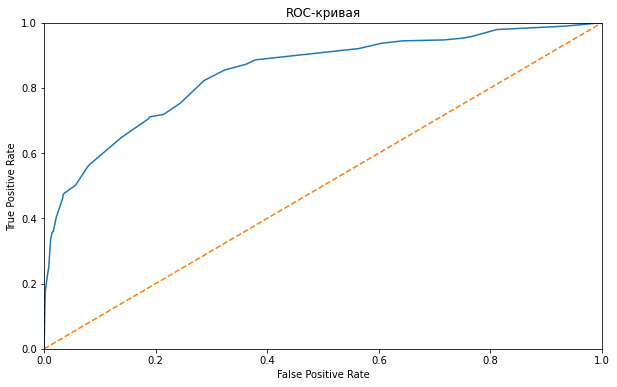

CPU times: user 133 ms, sys: 0 ns, total: 133 ms
Wall time: 137 ms


In [19]:
%%time

probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)

plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [20]:
# посмотрим на важность признаков для модели

fi = pd.DataFrame({'feature': list(features_train.columns),
                   'importance': model_dt.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi)

,feature,importance
1,age,0.434166
4,num_of_products,0.308021
6,is_active_member,0.085029
3,balance,0.083171
8,geography_Germany,0.040383
7,estimated_salary,0.029059
0,credit_score,0.010257
10,gender_Male,0.005120
2,tenure,0.004794
5,has_cr_card,0.000000


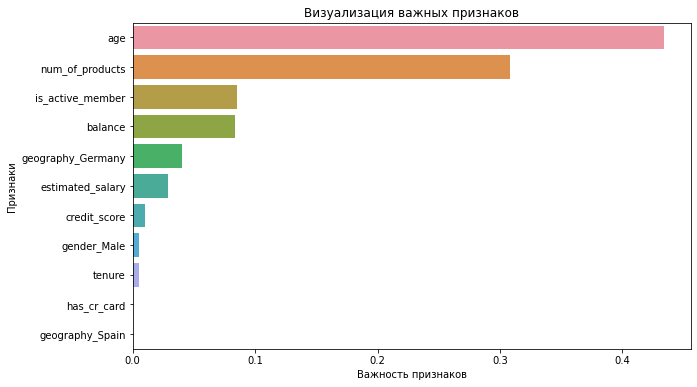

In [21]:
plt.figure(figsize=(10,6))

sns.barplot(x=fi['importance'], y=fi['feature'])

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [22]:
metrics(best_result_d, f1_d, auc_roc, 'DecisionTreeClassifier', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008


**Краткий вывод:** 
<br>Результат обучения модели Дерева решений на данный момент не очень высокий, он немного не дотягивает до поставленного порога. Анализ важности признаков показал, что такие признаки как - ***has_cr_card*** и ***geography_Spain***, не имеют вообще никакого влияния на обучение модели. Думаю, далее их можно будет отбросить. Сделаем это во время балансировки классов.

### Случайный лес

In [23]:
%%time 

# подберем наилучшие параметры для модели случайного леса

best_features = 0
best_criterion = None
best_depth = 0
best_model_r = None
best_result_r = 0
best_est = 0

for crit in tqdm(['gini', 'entropy']):
    for max_features in ['sqrt', 'log2']:
        for est in range(100,150,10):
            for depth in range(5,30):
                model_r = RandomForestClassifier(random_state=45, criterion=crit,
                                    max_features=max_features, max_depth=depth, n_estimators=est, n_jobs=-1)
                model_r.fit(features_train, target_train)
                predictions = model_r.predict(features_valid)
                result = model_r.score(features_valid, target_valid)
                if result > best_result_r:
                    best_criterion = crit
                    best_features = max_features
                    best_depth = depth
                    best_model_r = model_r
                    best_result_r = result
                    best_est = est

print('Accuracy наилучшей модели на валидационной выборке:', best_result_r)
print('Количество деревьев:', best_est)
print('Глубина:', best_depth)
print('Число признаков:', best_features)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [07:24<00:00, 222.50s/it]

Accuracy наилучшей модели на валидационной выборке: 0.8668866886688669
Количество деревьев: 100
Глубина: 10
Число признаков: sqrt
Критерий расщепления: gini
CPU times: user 10min, sys: 23.1 s, total: 10min 23s
Wall time: 7min 25s


In [24]:
%%time

model_rf = RandomForestClassifier(random_state=45, max_depth=10, criterion='gini', n_estimators=100, max_features='sqrt')
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)
f1_rf = f1_score(target_valid, predicted_valid)

print('Качество модели', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_rf)

Качество модели 0.8668866886688669
Precision 0.835820895522388
Recall 0.44562334217506633
F1 0.5813148788927336
CPU times: user 594 ms, sys: 9.44 ms, total: 603 ms
Wall time: 601 ms


AUC-ROC RandomForestClassifier 0.8707609842118924


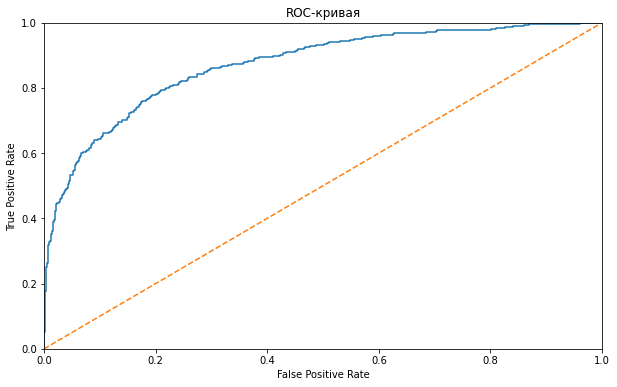

In [25]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_rf, tpr_rf)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [26]:
# посмотрим на важность признаков для модели

fi = pd.DataFrame({'feature': list(features_train.columns),
                   'importance': model_rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

display(fi)

,feature,importance
1,age,0.308467
4,num_of_products,0.197663
3,balance,0.114820
7,estimated_salary,0.095943
0,credit_score,0.094038
6,is_active_member,0.056755
2,tenure,0.051507
8,geography_Germany,0.039197
10,gender_Male,0.019296
5,has_cr_card,0.012425


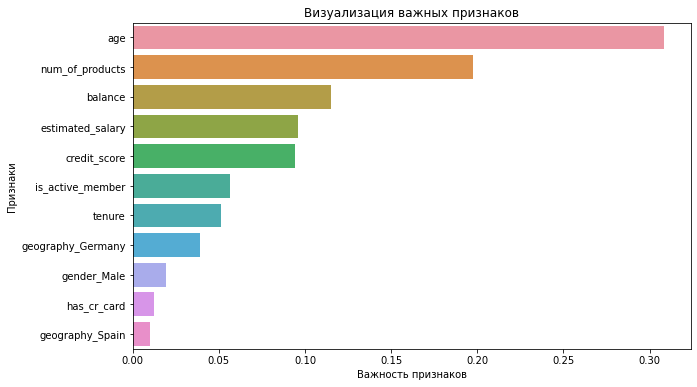

In [27]:
plt.figure(figsize=(10,6))

sns.barplot(x=fi['importance'], y=fi['feature'])

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [28]:
metrics(best_result_r, f1_rf, auc_roc_rf, 'RandomForestClassifier', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761


**Комментарий:**
<br> Результат обучения модели Случайного леса немного лучше, чем у Дерева решений. Показатель AUC-ROC также выше, чем у Дерева решений. Анализ важности признаков показал, что в целом каждый признак вносит свое влияние, однако признак ***geography_Spain*** имеет наименьшее значение, как и у модели Дерева решений. Думаю, что можно будет тоже без него посмотреть на показатели при балансировке.

### Логистическая регрессия

In [29]:
model_lr =  LogisticRegression(random_state=45, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_valid)
result_lr = accuracy_score(target_valid, predicted_valid)
print('Качество модели', result_lr)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_lr)

Качество модели 0.7887788778877888
Precision 0.40540540540540543
Recall 0.03978779840848806
F1 0.07246376811594203


AUC-ROC LogisticRegression 0.693795017827658


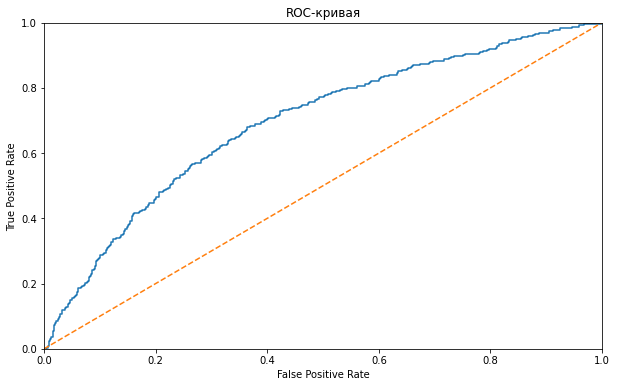

In [30]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression', auc_roc_lr)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [31]:
metrics(result_lr, f1_lr, auc_roc_lr, 'LogisticRegression', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795


**Комментарий:**
<br>Логистическая регрессия показала хороший результат метрики F1, гораздо более высокий, чем у предыдущих моделей. Однако показатель AUC ROC получился слишком низким. Посмотрим на результаты модели после балансировки.

AUC-ROC DecisionTreeClassifier 0.8450079796486747
AUC-ROC RandomForestClassifier 0.8707609842118924
AUC-ROC LogisticRegression 0.693795017827658


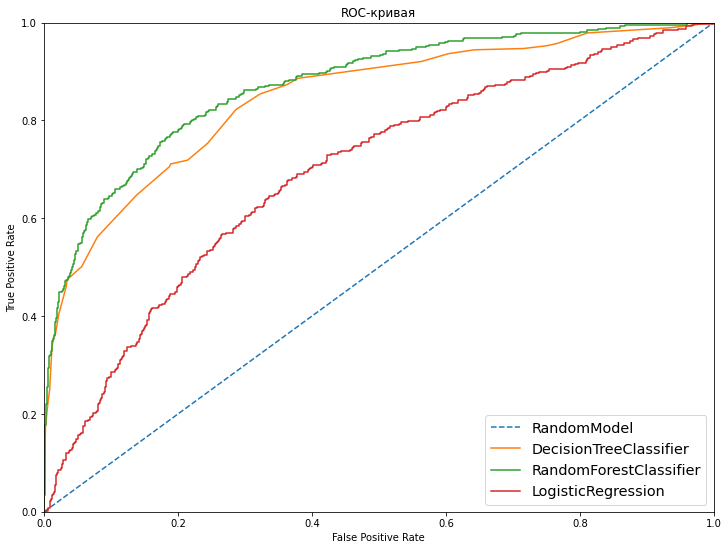

In [32]:
# для наглядности выведем все графики в один

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr_dt, tpr_dt, label='DecisionTreeClassifier')

print('AUC-ROC RandomForestClassifier',auc_roc_rf)
plt.plot(fpr_rf, tpr_rf, label='RandomForestClassifier')

print('AUC-ROC LogisticRegression',auc_roc_lr)
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

**Комментарий:**
<br>Модель Cлучайного леса показала себя лучше других, хотя ее показатели близки к модели дерева решений. Теперь попробуем наладить баланс и посмотреть, как модели себя поведут.

## Борьба с дисбалансом

### Дерево решений

#### Взвешивание классов

In [33]:
%%time

# подберем параметры для Дерева решения с взвешенными классами

best_criterion = None
best_depth = 0
best_model_d = None
best_result_d = 0

for crit in tqdm(['gini', 'entropy']):
    for depth in range(4,30): 
        model_d = DecisionTreeClassifier(random_state=4545, criterion=crit,
                                     max_depth=depth, class_weight='balanced')
        model_d.fit(features_train, target_train)
        predictions = model_d.predict(features_valid)
        result = model_d.score(features_valid, target_valid)
        if result > best_result_d:
           best_criterion = crit
           best_depth = depth
           best_model_d = model_d
           best_result_d = result
                    

print('Accuracy наилучшей модели на валидационной выборке:', best_result_d)
print('Глубина:', best_depth)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8036303630363036
Глубина: 26
Критерий расщепления: entropy
CPU times: user 1.87 s, sys: 7.26 ms, total: 1.88 s
Wall time: 1.89 s


In [34]:
model_d = DecisionTreeClassifier(random_state=4545, max_depth=26, class_weight='balanced', criterion='entropy')
model_d.fit(features_train, target_train)
predicted_valid = model_d.predict(features_valid)
f1_d = f1_score(target_valid, predicted_valid)
result_d = accuracy_score(target_valid, predicted_valid)
print('Качество модели', result_d)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_d)

Качество модели 0.8036303630363036
Precision 0.5259067357512953
Recall 0.5384615384615384
F1 0.5321100917431193


**Комментарий:**
<br>Показатели по модели без балансировки:

- Precision 0.7837837837837838
- Recall 0.46153846153846156

Интересно, что показатель полноты сильно увеличился, а точность намного упала.

AUC-ROC DecisionTreeClassifier 0.7057331980996102


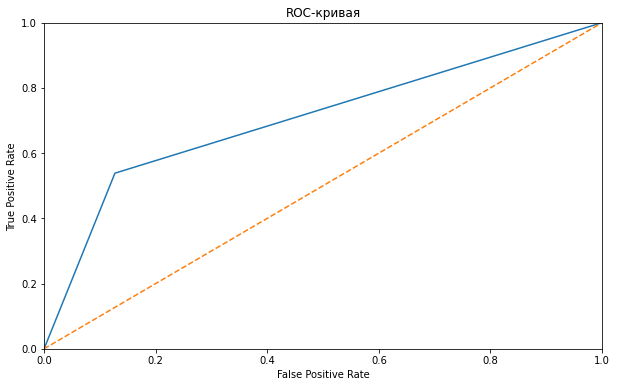

In [35]:
probabilities_valid = model_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_d = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_d)

plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [36]:
metrics(result_d, f1_d, auc_roc_d, 'DecisionTreeClassifier_balanced', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733


**Комментарий:**
<br>Взвешивание классов не дало ожидаемых результатов. Все метрики сильно уменьшились.

#### Увеличение выборки

In [37]:
# посмотрим на соотношение количества строк

rat = len(churn_ohe.loc[churn_ohe['exited']==0])//len(churn_ohe.loc[churn_ohe['exited']==1])
rat

3

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=45)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [39]:
print(target_upsampled.value_counts())

0    4328
1    3378
Name: exited, dtype: int64


In [40]:
%%time

# подберем параметры после увеличения выборки

best_criterion = None
best_depth = 0
best_model_d = None
best_result_d = 0

for crit in tqdm(['gini', 'entropy']):
    for depth in range(4,30): 
        model_d = DecisionTreeClassifier(random_state=4545, criterion=crit,
                                     max_depth=depth)
        model_d.fit(features_upsampled, target_upsampled)
        predictions = model_d.predict(features_valid)
        result = model_d.score(features_valid, target_valid)
        if result > best_result_d:
           best_criterion = crit
           best_depth = depth
           best_model_d = model_d
           best_result_d = result
                    

print('Accuracy наилучшей модели на валидационной выборке:', best_result_d)
print('Глубина:', best_depth)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

Accuracy наилучшей модели на валидационной выборке: 0.8173817381738174
Глубина: 5
Критерий расщепления: entropy
CPU times: user 2.07 s, sys: 3.32 ms, total: 2.07 s
Wall time: 2.08 s


In [41]:
model_d = DecisionTreeClassifier(random_state=4545, max_depth=5, criterion='entropy')
model_d.fit(features_upsampled, target_upsampled)
predicted_valid = model_d.predict(features_valid)
result_d = accuracy_score(target_valid, predicted_valid)
f1_d = f1_score(target_valid, predicted_valid)
print('Качество модели', result_d)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_d)

Качество модели 0.8173817381738174
Precision 0.5503355704697986
Recall 0.6525198938992043
F1 0.5970873786407768


**Комментарий:**
<br>Показатели по модели без увеличения выборки:

- Precision 0.7837837837837838
- Recall 0.46153846153846156

Интересно, что показатель полноты сильно увеличился, а точность намного упала. Такая же картина наблюдалась при взвешивании классов.

AUC-ROC DecisionTreeClassifier 0.8504225440261239


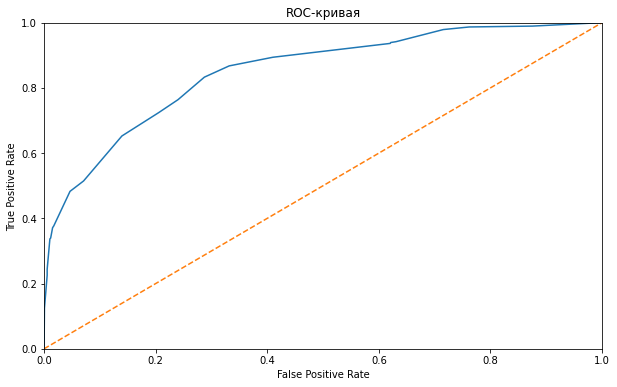

In [42]:
probabilities_valid = model_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_d = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_d)

plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [43]:
metrics(result_d, f1_d, auc_roc_d, 'DecisionTreeClassifier_upsampled', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423


**Комментарий:**
<br>Метрики F1 и AUC ROC выросли по сравнению с обычной моделью. Однако, показатель качества модели сильно упал.

#### Уменьшение выборки

In [44]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=45)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=45)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=45)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [45]:
print(target_downsampled.value_counts())

0    1298
1    1126
Name: exited, dtype: int64


In [46]:
%%time

# подберем параметры после уменьшения выборки

best_criterion = None
best_depth = 0
best_model_d = None
best_result_d = 0

for crit in tqdm(['gini', 'entropy']):
    for depth in range(4,30): 
        model_d = DecisionTreeClassifier(random_state=4545, criterion=crit,
                                     max_depth=depth)
        model_d.fit(features_downsampled, target_downsampled)
        predictions = model_d.predict(features_valid)
        result = model_d.score(features_valid, target_valid)
        if result > best_result_d:
           best_criterion = crit
           best_depth = depth
           best_model_d = model_d
           best_result_d = result
                    

print('Accuracy наилучшей модели на валидационной выборке:', best_result_d)
print('Глубина:', best_depth)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

Accuracy наилучшей модели на валидационной выборке: 0.7827282728272827
Глубина: 7
Критерий расщепления: entropy
CPU times: user 885 ms, sys: 1.27 ms, total: 886 ms
Wall time: 887 ms


In [47]:
model_d = DecisionTreeClassifier(random_state=4545, max_depth=7, criterion='entropy')
model_d.fit(features_downsampled, target_downsampled)
predicted_valid = model_d.predict(features_valid)
f1_d = f1_score(target_valid, predicted_valid)
result_d = accuracy_score(target_valid, predicted_valid)
print('Качество модели', result_d)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_d)

Качество модели 0.7827282728272827
Precision 0.4835766423357664
Recall 0.7029177718832891
F1 0.572972972972973


**Комментарий:**
<br>Показатели по модели без увеличения выборки:

- Precision 0.7837837837837838
- Recall 0.46153846153846156

Здесь также показатель точности сильно упал, а показатель полноты практически не изменился.

AUC-ROC DecisionTreeClassifier 0.8271600734090863


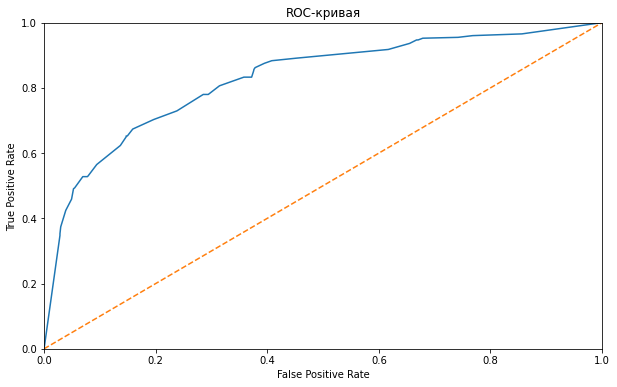

In [48]:
probabilities_valid = model_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_d = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_d)

plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [49]:
metrics(result_d, f1_d, auc_roc_d, 'DecisionTreeClassifier_downsampled', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716


**Комментарий:**
<br>Уменьшение выборки дало самые низкие результаты по модели Дерево решений.

### Случайный лес

#### Взвешивание классов

In [50]:
%%time 

# подберем наилучшие параметры для модели случайного леса с балансировкой

best_features = 0
best_criterion = None
best_depth = 0
best_model_r = None
best_result_r = 0
best_est = 0

for crit in tqdm(['gini', 'entropy']):
    for max_features in ['sqrt', 'log2']:
        for est in range(100,150,10):
            for depth in range(5,30):
                model_r = RandomForestClassifier(random_state=45, criterion=crit,
                                    max_features=max_features, max_depth=depth, n_estimators=est, n_jobs=-1, class_weight='balanced')
                model_r.fit(features_train, target_train)
                predictions = model_r.predict(features_valid)
                result = model_r.score(features_valid, target_valid)
                if result > best_result_r:
                    best_criterion = crit
                    best_features = max_features
                    best_depth = depth
                    best_model_r = model_r
                    best_result_r = result
                    best_est = est

print('Accuracy наилучшей модели на валидационной выборке:', best_result_r)
print('Количество деревьев:', best_est)
print('Глубина:', best_depth)
print('Число признаков:', best_features)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [07:40<00:00, 230.47s/it]

Accuracy наилучшей модели на валидационной выборке: 0.8657865786578658
Количество деревьев: 130
Глубина: 18
Число признаков: sqrt
Критерий расщепления: entropy
CPU times: user 10min 35s, sys: 22.5 s, total: 10min 57s
Wall time: 7min 40s


In [51]:
model_rf = RandomForestClassifier(random_state=45, n_estimators=130, class_weight='balanced', max_depth=18, max_features='sqrt', criterion='entropy')
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)
f1_r = f1_score(target_valid, predicted_valid)
result_r = accuracy_score(target_valid, predicted_valid)

print('Качество модели', result_r)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_r)

Качество модели 0.8657865786578658
Precision 0.7982062780269058
Recall 0.47214854111405835
F1 0.5933333333333334


**Модель без баланса давала следующие показатели:**

- Качество модели 0.8668866886688669
- Precision 0.835820895522388
- Recall 0.44562334217506633
- F1 0.5813148788927336

Взвешивание классов несильно отразилось на метриках.

AUC-ROC DecisionTreeClassifier 0.8685530052995175


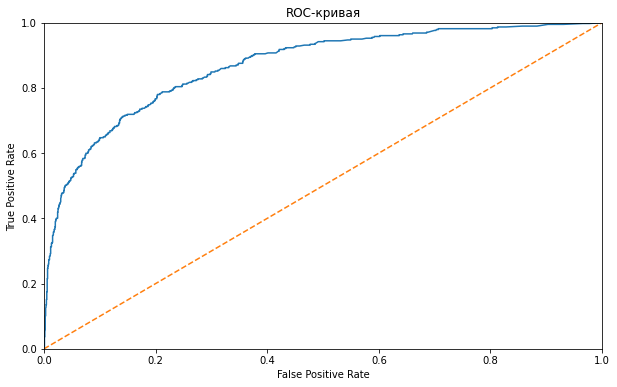

In [52]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_rf, tpr_rf)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [53]:
metrics(result_r, f1_r, auc_roc_rf, 'RandomForestClassifier_balanced', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
RandomForestClassifier_balanced,0.865787,0.593333,0.868553


#### Увеличение выборки

In [54]:
%%time 

# подберем наилучшие параметры для модели случайного леса

best_features = 0
best_criterion = None
best_depth = 0
best_model_r = None
best_result_r = 0
best_est = 0

for crit in tqdm(['gini', 'entropy']):
    for max_features in ['sqrt', 'log2']:
        for est in range(100,150,10):
            for depth in range(5,30):
                model_r = RandomForestClassifier(random_state=45, criterion=crit,
                                    max_features=max_features, max_depth=depth, n_estimators=est, n_jobs=-1)
                model_r.fit(features_upsampled, target_upsampled)
                predictions = model_r.predict(features_valid)
                result = model_r.score(features_valid, target_valid)
                if result > best_result_r:
                    best_criterion = crit
                    best_features = max_features
                    best_depth = depth
                    best_model_r = model_r
                    best_result_r = result
                    best_est = est

print('Accuracy наилучшей модели на валидационной выборке:', best_result_r)
print('Количество деревьев:', best_est)
print('Глубина:', best_depth)
print('Число признаков:', best_features)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [08:40<00:00, 260.40s/it]

Accuracy наилучшей модели на валидационной выборке: 0.8613861386138614
Количество деревьев: 110
Глубина: 23
Число признаков: sqrt
Критерий расщепления: gini
CPU times: user 12min 26s, sys: 22.1 s, total: 12min 48s
Wall time: 8min 40s


In [55]:
# т.к. увеличение выборки уже производилось, сразу приступим к обучению

model_rf = RandomForestClassifier(random_state=45, n_estimators=110, max_depth=23, max_features='sqrt', criterion='gini')
model_rf.fit(features_upsampled, target_upsampled)
predicted_valid = model_rf.predict(features_valid)
f1_r = f1_score(target_valid, predicted_valid)
result_r = accuracy_score(target_valid, predicted_valid)

print('Качество модели', result_r)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_r)

Качество модели 0.8613861386138614
Precision 0.711864406779661
Recall 0.5570291777188329
F1 0.625


**Модель без увеличения выборки давала следующие показатели:**

- Качество модели 0.8668866886688669
- Precision 0.835820895522388
- Recall 0.44562334217506633
- F1 0.5813148788927336

<br>По сравнению с изначальными результатами эта модель показала более высокие результаты.

AUC-ROC DecisionTreeClassifier 0.8584334854405925


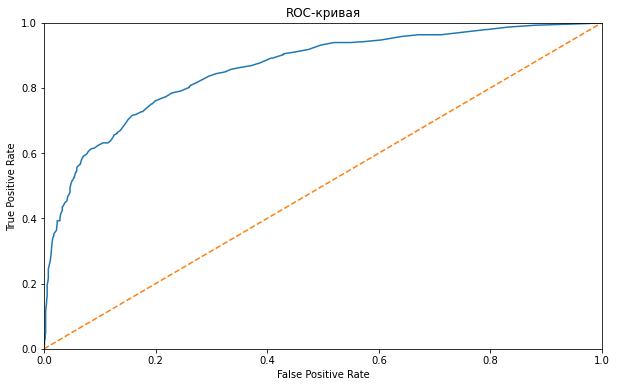

In [56]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_rf, tpr_rf)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [57]:
metrics(result_r, f1_r, auc_roc_rf, 'RandomForestClassifier_upsampled', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
RandomForestClassifier_balanced,0.865787,0.593333,0.868553
RandomForestClassifier_upsampled,0.861386,0.625,0.858433


#### Уменьшение выборки

In [58]:
%%time 

# подберем наилучшие параметры для модели случайного леса

best_features = 0
best_criterion = None
best_depth = 0
best_model_r = None
best_result_r = 0
best_est = 0

for crit in tqdm(['gini', 'entropy']):
    for max_features in ['sqrt', 'log2']:
        for est in range(100,150,10):
            for depth in range(5,30):
                model_r = RandomForestClassifier(random_state=45, criterion=crit,
                                    max_features=max_features, max_depth=depth, n_estimators=est, n_jobs=-1)
                model_r.fit(features_downsampled, target_downsampled)
                predictions = model_r.predict(features_valid)
                result = model_r.score(features_valid, target_valid)
                if result > best_result_r:
                    best_criterion = crit
                    best_features = max_features
                    best_depth = depth
                    best_model_r = model_r
                    best_result_r = result
                    best_est = est

print('Accuracy наилучшей модели на валидационной выборке:', best_result_r)
print('Количество деревьев:', best_est)
print('Глубина:', best_depth)
print('Число признаков:', best_features)
print('Критерий расщепления:', best_criterion)

100%|██████████| 2/2 [05:25<00:00, 162.74s/it]

Accuracy наилучшей модели на валидационной выборке: 0.8217821782178217
Количество деревьев: 100
Глубина: 8
Число признаков: sqrt
Критерий расщепления: gini
CPU times: user 5min 56s, sys: 25.3 s, total: 6min 22s
Wall time: 5min 25s


In [59]:
# т.к. уменьшение выборки уже производилось, сразу приступим к обучению

model_rf = RandomForestClassifier(random_state=45, n_estimators=100, max_depth=8, max_features='sqrt', criterion='gini')
model_rf.fit(features_downsampled, target_downsampled)
predicted_valid = model_rf.predict(features_valid)
f1_r = f1_score(target_valid, predicted_valid)
result_r = accuracy_score(target_valid, predicted_valid)

print('Качество модели', result_r)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_r)

Качество модели 0.8217821782178217
Precision 0.5522682445759369
Recall 0.7427055702917772
F1 0.6334841628959276


**Модель без уменьшения выборки давала следующие показатели:**

- Качество модели 0.8668866886688669
- Precision 0.835820895522388
- Recall 0.44562334217506633
- F1 0.5813148788927336

<br>Уменьшение выборки показало хорошие результаты.

AUC-ROC DecisionTreeClassifier 0.8717733963851363


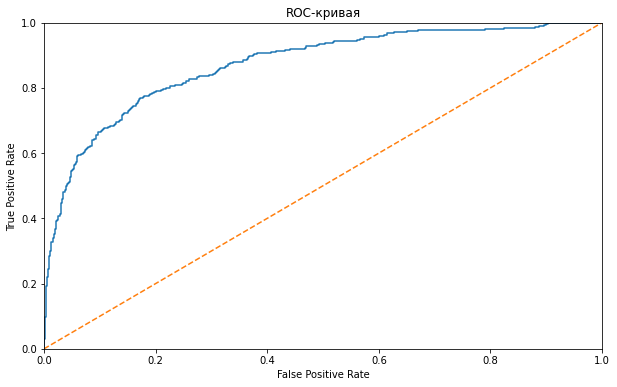

In [60]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier', auc_roc_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_rf, tpr_rf)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [61]:
metrics(result_r, f1_r, auc_roc_rf, 'RandomForestClassifier_downsampled', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
RandomForestClassifier_balanced,0.865787,0.593333,0.868553
RandomForestClassifier_upsampled,0.861386,0.625,0.858433
RandomForestClassifier_downsampled,0.821782,0.633484,0.871773


### Логистическая регрессия

#### Взвешивание классов

In [62]:
model_lr = LogisticRegression(random_state=45, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
result_lr = accuracy_score(target_valid, predicted_valid)
f1_lr = f1_score(target_valid, predicted_valid)

print('Качество модели', result_lr)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_lr)

Качество модели 0.7046204620462047
Precision 0.3853868194842407
Recall 0.713527851458886
F1 0.5004651162790699


**Модель без баланса давала следующие показатели:**

- Качество модели 0.7887788778877888
- Precision 0.40540540540540543
- Recall 0.03978779840848806
- F1 0.07246376811594203

<br>Метрика F1 очень сильно выросла, как и метрика точности. 

AUC-ROC LogisticRegression 0.7694442961618535


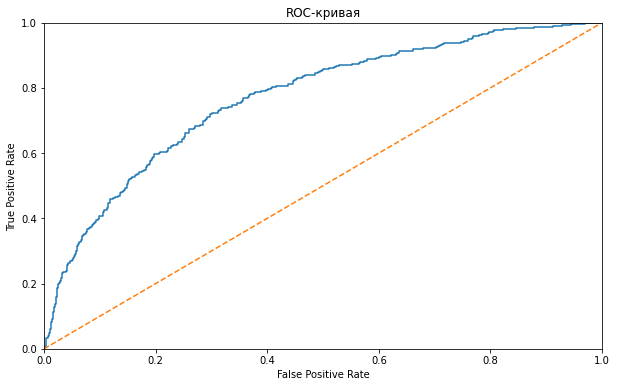

In [63]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression', auc_roc_lr)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [64]:
metrics(result_lr, f1_lr, auc_roc_lr, 'LogisticRegression_balanced', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
RandomForestClassifier_balanced,0.865787,0.593333,0.868553
RandomForestClassifier_upsampled,0.861386,0.625,0.858433
RandomForestClassifier_downsampled,0.821782,0.633484,0.871773
LogisticRegression_balanced,0.70462,0.500465,0.769444


#### Увеличение выборки

In [65]:
model_lr = LogisticRegression(random_state=45, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)
result_lr = accuracy_score(target_valid, predicted_valid)
f1_lr = f1_score(target_valid, predicted_valid)


print('Качество модели', result_lr)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_lr)

Качество модели 0.7326732673267327
Precision 0.3977485928705441
Recall 0.5623342175066313
F1 0.4659340659340659


**Модель без увеличения выборки давала следующие показатели:**

- Качество модели 0.7887788778877888
- Precision 0.40540540540540543
- Recall 0.03978779840848806
- F1 0.07246376811594203

<br>Результаты похожи на результаты выборки с балансировкой, но показатель F1 получился меньше. 

AUC-ROC LogisticRegression 0.7293141183638683


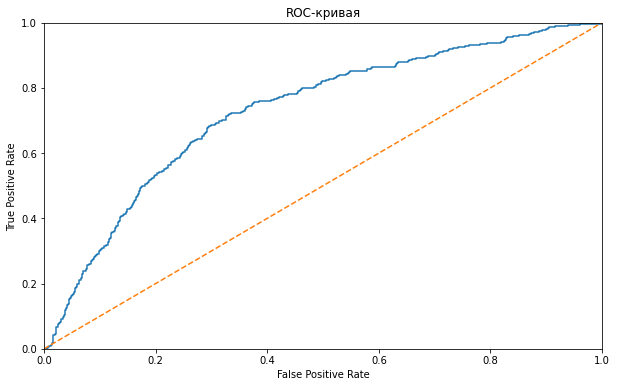

In [66]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression', auc_roc_lr)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [67]:
metrics(result_lr, f1_lr, auc_roc_lr, 'LogisticRegression_upsampled', compare_models)

,Accuracy_valid,F1 score,AUC ROC
DecisionTreeClassifier,0.861936,0.580968,0.845008
RandomForestClassifier,0.866887,0.581315,0.870761
LogisticRegression,0.788779,0.072464,0.693795
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
RandomForestClassifier_balanced,0.865787,0.593333,0.868553
RandomForestClassifier_upsampled,0.861386,0.625,0.858433
RandomForestClassifier_downsampled,0.821782,0.633484,0.871773
LogisticRegression_balanced,0.70462,0.500465,0.769444


#### Уменьшение выборки

In [68]:
model_lr = LogisticRegression(random_state=45, solver='liblinear')
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr.predict(features_valid)
result_lr = accuracy_score(target_valid, predicted_valid)
f1_lr = f1_score(target_valid, predicted_valid)


print('Качество модели', result_lr)
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_lr)

Качество модели 0.7073707370737073
Precision 0.376
Recall 0.623342175066313
F1 0.46906187624750495


**Модель без уменьшения выборки давала следующие показатели:**

- Качество модели 0.7887788778877888
- Precision 0.40540540540540543
- Recall 0.03978779840848806
- F1 0.07246376811594203

При уменьшении выборки показатели логистической регрессии проявили себя хуже всего.

In [69]:
metrics(result_lr, f1_lr, auc_roc_lr, 'LogisticRegression_downsampled', compare_models).sort_values('F1 score', ascending=False)

,Accuracy_valid,F1 score,AUC ROC
RandomForestClassifier_downsampled,0.821782,0.633484,0.871773
RandomForestClassifier_upsampled,0.861386,0.625,0.858433
DecisionTreeClassifier_upsampled,0.817382,0.597087,0.850423
RandomForestClassifier_balanced,0.865787,0.593333,0.868553
RandomForestClassifier,0.866887,0.581315,0.870761
DecisionTreeClassifier,0.861936,0.580968,0.845008
DecisionTreeClassifier_downsampled,0.782728,0.572973,0.82716
DecisionTreeClassifier_balanced,0.80363,0.53211,0.705733
LogisticRegression_balanced,0.70462,0.500465,0.769444
LogisticRegression_downsampled,0.707371,0.469062,0.729314


**Комментарий:**

<br>Модель Случайного леса с уменьшением выборки показала наиболее высокий результат как по метрике F1, так и по AUC ROC. Самый низкий результат получился у Логистической регрессии, причем все ее модели оказались с низкими результатами. По качеству модели показатель самый высокий также у Случайного леса (без манипуляций с выборками). На втором месте модель Случайного леса с увеличенной выборкой. Интересно, что показатель качества у модели с увеличенной выборкой гораздо лучше, показатель F1 фактически равен показателю у модели с уменьшенной выборкой. 
<br>Для дальнейшей работы я бы взяла модель Случайного леса с уменьшенной выборкой, так как показатели у нее наиболее высокие.

## Тестирование модели

In [70]:
%%time

#сделаем финальный тест

model_rf_d = RandomForestClassifier(random_state=254, n_estimators=100, max_depth=8, max_features='sqrt', criterion='gini')
model_rf_d.fit(features_downsampled, target_downsampled)
predicted_test = model_rf_d.predict(features_test)
result_rf_d = accuracy_score(target_test, predicted_test)
f1_rf_d = f1_score(target_test, predicted_test)


print('Качество модели', result_rf_d)
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_rf_d)

Качество модели 0.8119846069268829
Precision 0.5087719298245614
Recall 0.7435897435897436
F1 0.6041666666666666
CPU times: user 335 ms, sys: 47.8 ms, total: 383 ms
Wall time: 336 ms


Пороговый показатель достигнут, хоть он и ниже, чем на валидационной выборке. Были внесены изменения в показатель random_state. Без изменений метрика F1 также проходит пороговое значение - 0.59.

AUC-ROC RandomForestClassifier 0.8609636150508085


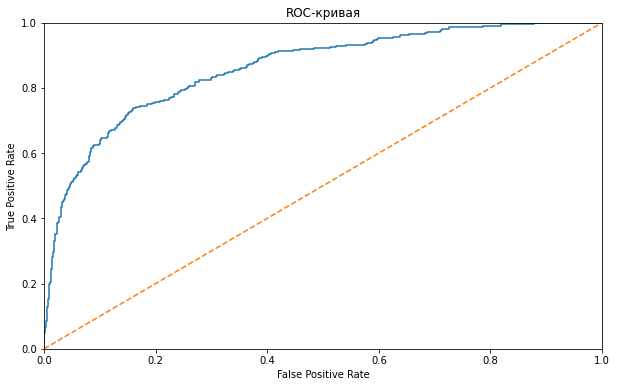

In [71]:
probabilities_test = model_rf_d.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier',auc_roc)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()


AUC-ROC RandomForestClassifier_train 0.8717733963851363
AUC-ROC RandomForestClassifier_test 0.8609636150508085


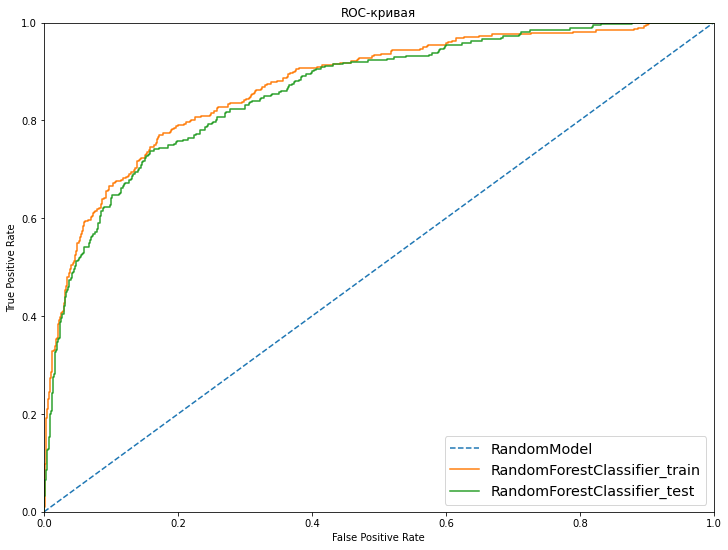

In [72]:
# сравним ROC кривые модели на обучении и тесте

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

print('AUC-ROC RandomForestClassifier_train',auc_roc_rf)
plt.plot(fpr_rf, tpr_rf, label='RandomForestClassifier_train')

print('AUC-ROC RandomForestClassifier_test',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier_test')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

## Общий вывод

- Модель Случайного леса показала себя лучше остальных и при дисбалансе, и при увеличении, и при уменьшении выборки.
- Сравнение ROC кривых Случайного леса с уменьшением выборки на обучении и тесте показало нам, что на обучении модель давала лучшие результаты, однако разница не такая уж и большая.
- В данном случае уменьшение выборки сыграло основную роль.
- Модель логистической регрессии дала самые худшие показатели во всех вариантах.

<br>Модель случайного леса с уменьшенной выборкой рекомендуется к работе заказчику.